# Импорты библиотек

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cv2
import os

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

from os import listdir

from tqdm import tqdm

# Представляем данные в датасете

## В датасете есть 5 классов цветов:
### daisy - маргаритки
### dandelion - одуванчики
### tulip - тюльпаны
### sunflower - подсолнухи
### rose - розы



# Определение основных переменных 

In [41]:
MAX_PIXELS_WIDTH = 126 # ширина картинки
MAX_PIXELS_HEIGHT = 126 # высота картинки
BATCH_SIZE = 50 # размер батча
X = [] # представление изображения в виде массива
Z = [] # лэйблы изображений

# переменные для обработки изображений
INITIAL_FLOWER_DIR = "../input/flowers-recognition/flowers"
FLOWER_DAISY_DIR='../input/flowers-recognition/flowers/daisy'
FLOWER_SUNFLOWER_DIR='../input/flowers-recognition/flowers/sunflower'
FLOWER_TULIP_DIR='../input/flowers-recognition/flowers/tulip'
FLOWER_DANDI_DIR='../input/flowers-recognition/flowers/dandelion'
FLOWER_ROSE_DIR='../input/flowers-recognition/flowers/rose'



flowers_dirs = [FLOWER_DAISY_DIR, FLOWER_SUNFLOWER_DIR, FLOWER_TULIP_DIR, FLOWER_DANDI_DIR, FLOWER_ROSE_DIR]
flowers_label = ["daisy", "sunflower","tulip", "dandelion", "rose"]

print()

# Подготавливаем данные

In [42]:
def make_train_data(flower_type,DIR): ## ресайзит изображения в папке до значений переданных в переменную
    for img in tqdm(os.listdir(DIR)):
        label=flower_type
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (MAX_PIXELS_WIDTH,MAX_PIXELS_HEIGHT))
       
        
        X.append(np.array(img))
        Z.append(str(label))


for i in range(5):
    make_train_data(flowers_label[i], flowers_dirs[i])

print(F"Length of X array len(X)")

100%|██████████| 784/784 [00:01<00:00, 506.63it/s]

Length of X array len(X)


In [43]:
from sklearn.model_selection import train_test_split
# Лэйбл энкодер переводит метки в цифр
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

# Создаем модель

In [44]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (MAX_PIXELS_WIDTH,MAX_PIXELS_HEIGHT,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
# model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 126, 126, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 31, 31, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 31, 31, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 15, 15, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │       1,605,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,850,821 (7.06 MB)

 Trainable params: 1,850,181 (7.06 MB)

 Non-trainable params: 640 (2.50 KB)

In [46]:
optimizer = Adam(learning_rate=0.001)

In [47]:
model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [48]:
history = model.fit(x_train,y_train,epochs=20,batch_size=BATCH_SIZE,validation_data = (x_test,y_test))

Epoch 1/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 15s 103ms/step - accuracy: 0.3772 - loss: 2.5272 - val_accuracy: 0.2257 - val_loss: 4.2665
Epoch 2/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.4528 - loss: 1.6134 - val_accuracy: 0.2257 - val_loss: 6.7765
Epoch 3/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5471 - loss: 1.1322 - val_accuracy: 0.2257 - val_loss: 11.0110
Epoch 4/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5839 - loss: 1.0592 - val_accuracy: 0.2257 - val_loss: 8.0270
Epoch 5/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.6161 - loss: 0.9974 - val_accuracy: 0.2280 - val_loss: 6.4557
Epoch 6/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.6198 - loss: 0.8974 - val_accuracy: 0.2859 - val_loss: 3.7425
Epoch 7/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.6601 - loss: 0.8624 - val_accuracy: 0.3715 - val_loss: 2.4461
Epoch 8/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7094 - loss: 0.7477 - val_accuracy: 0.4514 

# Создаем график accuracy

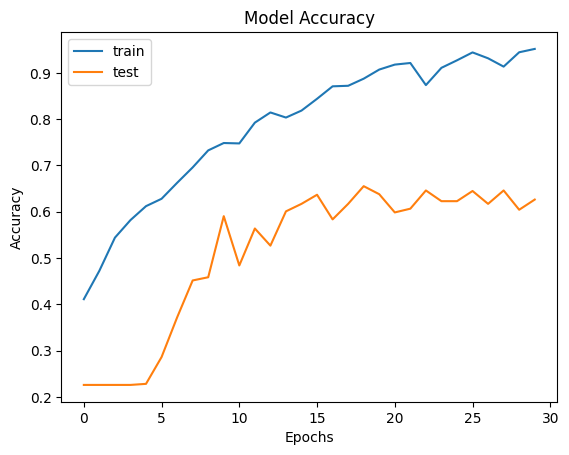

In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

### Максимум данной модели 70 процентов accuracy

## Замечен underfitting, попробуем добавить ImageDataGenerator(аугментация изображений)


In [50]:
datagen = ImageDataGenerator(
        # featurewise_center=False,  # set input mean to 0 over the dataset
        # samplewise_center=False,  # set each sample mean to 0
        # featurewise_std_normalization=False,  # divide inputs by std of the dataset
        # samplewise_std_normalization=False,  # divide each input by its std
        # zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.4,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.4,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
## суть в генерации новых изображений

datagen.fit(x_train)

In [59]:
History = model.fit(datagen.flow(x_train,y_train, batch_size=BATCH_SIZE),
                               epochs = 20, validation_data = (x_test,y_test),
                             )

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 185ms/step - accuracy: 0.7262 - loss: 0.7435 - val_accuracy: 0.6910 - val_loss: 1.5380
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 175ms/step - accuracy: 0.7606 - loss: 0.6769 - val_accuracy: 0.6412 - val_loss: 2.1639
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 177ms/step - accuracy: 0.7551 - loss: 0.6508 - val_accuracy: 0.6169 - val_loss: 2.2133
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 182ms/step - accuracy: 0.7807 - loss: 0.5815 - val_accuracy: 0.7465 - val_loss: 0.9629
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 176ms/step - accuracy: 0.7901 - loss: 0.5970 - val_accuracy: 0.7616 - val_loss: 0.7929
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 183ms/step - accuracy: 0.7815 - loss: 0.5846 - val_accuracy: 0.7141 - val_loss: 0.8796
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 184ms/step - accuracy: 0.7787 - loss: 0.5902 - val_accuracy: 0.7419 - val_loss: 0.8494
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 176ms/step - accuracy: 0.7893 - loss: 0.5698 - val_accu

# Строим второй график

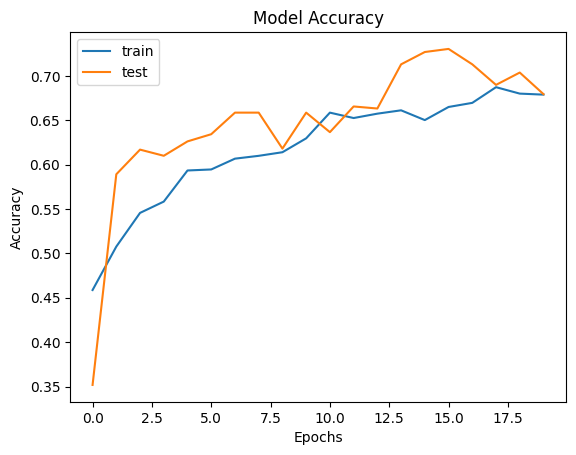

In [52]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

### На данный момент получилось добиться максимум до 75 процентов accuracy

# Попробуем тренированные модели, а именно VGG16

In [53]:
X = []
Z = []
def make_train_data(flower_type,DIR): ## ресайзит изображения в папке до значений переданных в переменную
    for img in tqdm(os.listdir(DIR)):
        label=flower_type
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (MAX_PIXELS_WIDTH, MAX_PIXELS_HEIGHT))
       
        
        X.append(np.array(img))
        Z.append(str(label))


for i in range(5):
    make_train_data(flowers_label[i], flowers_dirs[i])

print(F"Length of X array len(X)")


from sklearn.model_selection import train_test_split
# Лэйбл энкодер переводит метки в цифр
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

100%|██████████| 784/784 [00:01<00:00, 449.86it/s]


Length of X array len(X)


In [54]:


from keras.applications.vgg16 import VGG16
import keras
vgg16_layer = VGG16(include_top = False, pooling='avg', weights='imagenet')
import tensorflow as tf
print(tf.executing_eagerly())
tf.compat.v1.enable_eager_execution()
model2 = Sequential()
model2.add(vgg16_layer)
model2.add(Flatten())
model2.add(BatchNormalization())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(5, activation='softmax'))

model2.layers[0].trainable = False

True


In [55]:
model2.compile(optimizer=optimizer, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 512)                 │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,549,713 (70.76 MB)

 Trainable params: 133,637 (522.02 KB)

 Non-trainable params: 14,715,712 (56.14 MB)

 Optimizer params: 3,700,364 (14.12 MB)

In [66]:
import tensorflow as tf
print(tf.executing_eagerly())
tf.compat.v1.enable_eager_execution()
datagen = ImageDataGenerator(
        # featurewise_center=False,  # set input mean to 0 over the dataset
        # samplewise_center=False,  # set each sample mean to 0
        # featurewise_std_normalization=False,  # divide inputs by std of the dataset
        # samplewise_std_normalization=False,  # divide each input by its std
        # zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
## суть в генерации новых изображений

datagen.fit(x_train)

train_generator = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

import tensorflow as tf
tf.config.run_functions_eagerly(True)
model2.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


True


In [67]:
history_of_vgg16 = model2.fit(train_generator, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 30s 413ms/step - accuracy: 0.4858 - loss: 1.4267 - val_accuracy: 0.5208 - val_loss: 1.1534
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 26s 364ms/step - accuracy: 0.7189 - loss: 0.7526 - val_accuracy: 0.6910 - val_loss: 0.9202
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 355ms/step - accuracy: 0.7421 - loss: 0.6884 - val_accuracy: 0.7465 - val_loss: 0.7665
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 358ms/step - accuracy: 0.7738 - loss: 0.6066 - val_accuracy: 0.7650 - val_loss: 0.6832
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 26s 363ms/step - accuracy: 0.7994 - loss: 0.5339 - val_accuracy: 0.7743 - val_loss: 0.6361
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 361ms/step - accuracy: 0.7973 - loss: 0.5368 - val_accuracy: 0.7708 - val_loss: 0.6102
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 358ms/step - accuracy: 0.8022 - loss: 0.5270 - val_accuracy: 0.7905 - val_loss: 0.6038
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 360ms/step - accuracy: 0.8185 - loss: 0.4816 - val_accu

In [ ]:
plt.plot(history_of_vgg16.history['accuracy'])
plt.plot(history_of_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

# Итоги работы
### Мною получилось построить 3 модели с разными типами,могу сказать, что самой лучшей оказался претренированная модель VGG16, в отличие от мною собранных нейронных сетей